In [10]:
import pandas as pd

In [11]:
df = pd.read_pickle("./df.pkl")

In [12]:
df

,Casing Pressure (psi),Tubing Pressure (psi),Pump Fillage (%),Percent Run (%),Peak Load (lbs),Minimum Load (lbs),Fluid Load (lbs),time (hours),Name,failing
0,6279.591247,5638.854184,14.453159,100.0,9623.980208,7715.133166,6610.604819,0,Federal 12-117H,0
1,5671.026310,5093.302458,26.132123,100.0,1608.183423,12018.912662,6012.466873,1,Federal 12-117H,0
2,6151.434620,5035.725050,43.510109,100.0,3294.163547,10309.856895,5424.490385,2,Federal 12-117H,0
3,5220.438746,5036.170315,48.348392,100.0,11370.870514,5802.936871,4861.166756,3,Federal 12-117H,0
4,4803.461611,4640.012420,72.258257,100.0,6797.139157,7258.106140,4314.398761,4,Federal 12-117H,0
...,...,...,...,...,...,...,...,...,...,...
43686,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43686,Sundae 10-202H,0
43687,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43687,Sundae 10-202H,0
43688,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43688,Sundae 10-202H,0
43689,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43689,Sundae 10-202H,0


In [13]:
df.shape

(253587, 10)

In [14]:
df = df[df["Peak Load (lbs)"] >= df["Minimum Load (lbs)"]]

In [15]:
df.shape

(152101, 10)

In [16]:
df["load_ratio"] = df["Peak Load (lbs)"] / df["Minimum Load (lbs)"]

/home/ethanzh/Code/rod-pump-analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df

,Casing Pressure (psi),Tubing Pressure (psi),Pump Fillage (%),Percent Run (%),Peak Load (lbs),Minimum Load (lbs),Fluid Load (lbs),time (hours),Name,failing,load_ratio
0,6279.591247,5638.854184,14.453159,100.0,9623.980208,7715.133166,6610.604819,0,Federal 12-117H,0,1.247416
3,5220.438746,5036.170315,48.348392,100.0,11370.870514,5802.936871,4861.166756,3,Federal 12-117H,0,1.959503
6,3757.667418,3591.679032,49.271101,100.0,7477.330069,7047.156029,3483.932474,6,Federal 12-117H,0,1.061042
10,3097.555777,2654.664655,67.655317,100.0,10651.878338,7300.398688,2421.059479,10,Federal 12-117H,0,1.459082
11,3759.368424,2820.634241,77.824439,100.0,11500.035076,5903.557079,2178.023221,11,Federal 12-117H,0,1.947984
...,...,...,...,...,...,...,...,...,...,...,...
43686,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43686,Sundae 10-202H,0,NaN
43687,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43687,Sundae 10-202H,0,NaN
43688,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43688,Sundae 10-202H,0,NaN
43689,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43689,Sundae 10-202H,0,NaN


In [30]:
new_df = df.reset_index()
first = True
i = 0
for index, row in new_df.iterrows():
    i += 1
    if i % 5000 == 0:
        print(f"[{i}/{new_df.shape[0]}]")
    row["load_ratio_delta"] = row["load_ratio"] - new_df.iloc[index - 1]["load_ratio"] if index != 0 else 0

[500/152101]
[1000/152101]
[1500/152101]
[2000/152101]
[2500/152101]
[3000/152101]
[3500/152101]
[4000/152101]
[4500/152101]
[5000/152101]
[5500/152101]
[6000/152101]
[6500/152101]
[7000/152101]
[7500/152101]
[8000/152101]
[8500/152101]
[9000/152101]
[9500/152101]
[10000/152101]
[10500/152101]
[11000/152101]
[11500/152101]
[12000/152101]
[12500/152101]
[13000/152101]
[13500/152101]
[14000/152101]
[14500/152101]
[15000/152101]
[15500/152101]
[16000/152101]
[16500/152101]
[17000/152101]
[17500/152101]
[18000/152101]
[18500/152101]
[19000/152101]
[19500/152101]
[20000/152101]
[20500/152101]
[21000/152101]
[21500/152101]
[22000/152101]
[22500/152101]
[23000/152101]
[23500/152101]
[24000/152101]
[24500/152101]
[25000/152101]
[25500/152101]
[26000/152101]
[26500/152101]
[27000/152101]
[27500/152101]
[28000/152101]
[28500/152101]
[29000/152101]
[29500/152101]
[30000/152101]
[30500/152101]
[31000/152101]
[31500/152101]
[32000/152101]
[32500/152101]
[33000/152101]
[33500/152101]
[34000/152101]


In [31]:
new_df

,index,Casing Pressure (psi),Tubing Pressure (psi),Pump Fillage (%),Percent Run (%),Peak Load (lbs),Minimum Load (lbs),Fluid Load (lbs),time (hours),Name,failing,load_ratio
0,0,6279.591247,5638.854184,14.453159,100.0,9623.980208,7715.133166,6610.604819,0,Federal 12-117H,0,1.247416
1,3,5220.438746,5036.170315,48.348392,100.0,11370.870514,5802.936871,4861.166756,3,Federal 12-117H,0,1.959503
2,6,3757.667418,3591.679032,49.271101,100.0,7477.330069,7047.156029,3483.932474,6,Federal 12-117H,0,1.061042
3,10,3097.555777,2654.664655,67.655317,100.0,10651.878338,7300.398688,2421.059479,10,Federal 12-117H,0,1.459082
4,11,3759.368424,2820.634241,77.824439,100.0,11500.035076,5903.557079,2178.023221,11,Federal 12-117H,0,1.947984
...,...,...,...,...,...,...,...,...,...,...,...,...
152096,43686,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43686,Sundae 10-202H,0,NaN
152097,43687,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43687,Sundae 10-202H,0,NaN
152098,43688,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43688,Sundae 10-202H,0,NaN
152099,43689,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,43689,Sundae 10-202H,0,NaN


In [34]:
new_df.dropna(axis=0)

,index,Casing Pressure (psi),Tubing Pressure (psi),Pump Fillage (%),Percent Run (%),Peak Load (lbs),Minimum Load (lbs),Fluid Load (lbs),time (hours),Name,failing,load_ratio
0,0,6279.591247,5638.854184,14.453159,100.0,9623.980208,7715.133166,6610.604819,0,Federal 12-117H,0,1.247416
1,3,5220.438746,5036.170315,48.348392,100.0,11370.870514,5802.936871,4861.166756,3,Federal 12-117H,0,1.959503
2,6,3757.667418,3591.679032,49.271101,100.0,7477.330069,7047.156029,3483.932474,6,Federal 12-117H,0,1.061042
3,10,3097.555777,2654.664655,67.655317,100.0,10651.878338,7300.398688,2421.059479,10,Federal 12-117H,0,1.459082
4,11,3759.368424,2820.634241,77.824439,100.0,11500.035076,5903.557079,2178.023221,11,Federal 12-117H,0,1.947984
...,...,...,...,...,...,...,...,...,...,...,...,...
152083,43670,7584.609614,6482.663144,6.601790,100.0,9319.552401,7256.998899,11067.584536,43670,Sundae 10-202H,1,1.284216
152084,43671,7811.633008,6932.824552,9.940877,100.0,12763.563323,5889.234327,11555.173526,43671,Sundae 10-202H,1,2.167270
152085,43672,7242.424773,7209.713502,0.661198,100.0,15257.285999,5416.893909,12054.700042,43672,Sundae 10-202H,1,2.816612
152086,43674,8317.471994,8228.985191,27.451905,100.0,9082.419362,7216.419893,12941.952906,43674,Sundae 10-202H,1,1.258577


In [40]:
import matplotlib.pyplot as plt

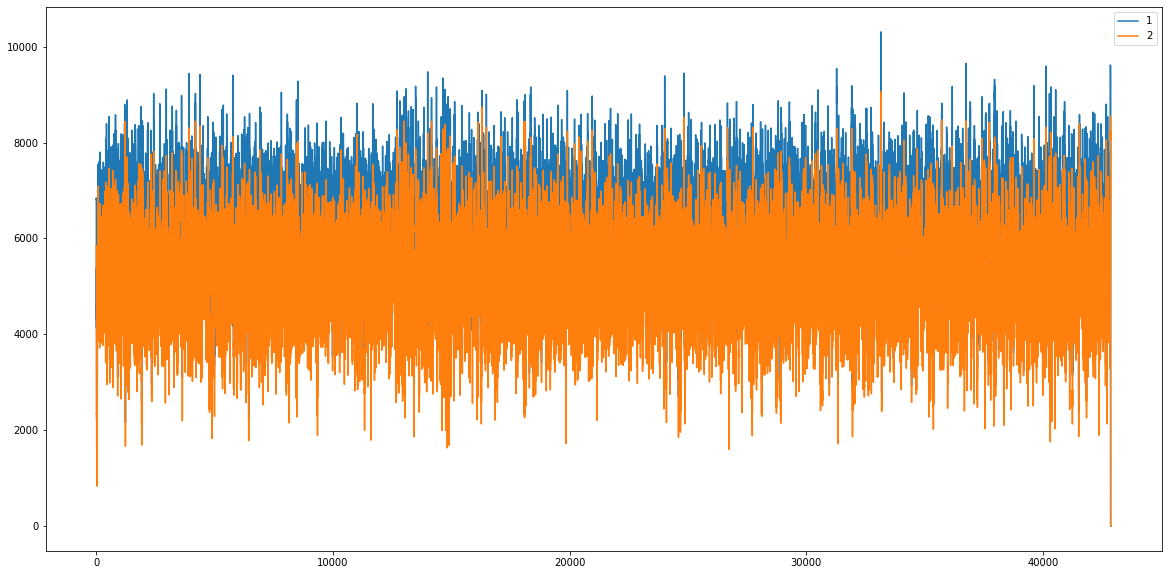

In [46]:

new_df = pd.read_csv("./rod_pump/Brisket 12-18H.csv")
plt.figure(figsize=(20,10))
plt.plot(new_df["time (hours)"], new_df["Casing Pressure (psi)"])
plt.plot(new_df["time (hours)"], new_df["Tubing Pressure (psi)"])
plt.legend(["1", "2"])
plt.show()